In [21]:
# Import required packages
from __future__ import print_function
import pandas as pd
import numpy as np


from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


import matplotlib.pyplot as plt

from IPython.display import display, Math #



In [58]:
def my_plot(errors, curves_labels, metric, algthm_type, with_std=False, std_vector=None):
    # errors: a list of numpy arrays with percentages in [0,100]
    # curves_labels: a list of strings with the labels for each curve in a single plot
    # yaxis: either prediction of recall. Raise exception otherwise
    
    # a couple exception to make make it work properly
    if metric == 'precision' or metric == 'recall':
        if metric == 'precision':
            yaxis_label = r'\textbf{Precision} [\%]'
        if metric == 'recall':
            yaxis_label = r'\textbf{Recall} [\%]'
    else:
        raise Exception('metric must be either precision or recall')
    
    if len(errors) != len(curves_labels):
        raise Exception('Number of labels do not coinside the number of curves')
        
    
        
    
    # curvilinear abscissa
    abscissa = np.loadtxt("../abscissa.txt")
    
    # plotting settings
    plt.rc('font',**{'family':'serif','serif':['Palatino']})
    plt.rc('text', usetex=True)

    
    # get percentage of 1s at each location
    Data_Cell = pd.read_excel("../PTResults-1000.xlsx")
    meanWater = np.zeros(len(abscissa))
    for h in range(len(abscissa)):
        location = Data_Cell.iloc[:,h+5]
        meanWater[h] = np.sum(location.values)/1000 * 100 # multiply pdf by 100
                                                          #    to get percentage

    plt.fill_between(abscissa, meanWater, color='lightgray')
    
    
    # plot metric curves
    for (error, curve, i_color) in zip(errors, curves_labels, range(len(errors))):
        plt.plot(abscissa, error, color='C'+str(i_color),label=curve)
    
        
    # axis label settings
    plt.xlabel(r'\textbf{Abscissa}',fontsize=12)
    plt.ylabel(yaxis_label,fontsize=16)
    plt.ylim(-0.5,105)
    plt.legend()
    
    # plot std curves
    if with_std == True:
        for (error, std) in zip(errors, std_vector):
            plt.fill_between(abscissa, error+np.sqrt(std), error, color='lightgray')
            plt.fill_between(abscissa, error, error-np.sqrt(std), color='lightgray')
    
    
    # saving fig
    if with_std==True: 
        plt.savefig('../Plots/std_'+str(algthm_type)+'_'+str(metric)+'.eps')
    else:
        plt.savefig('../Plots/'+str(algthm_type)+'_'+str(metric)+'.eps')
    
    
    # clear figure
    plt.show()
    plt.clf()
    
    
    

SVC_sigmoid0_c_0.001
[C] 0.001


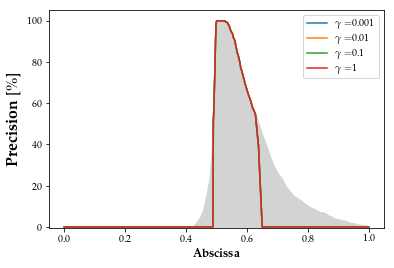

SVC_sigmoid0_c_0.01
[C] 0.01


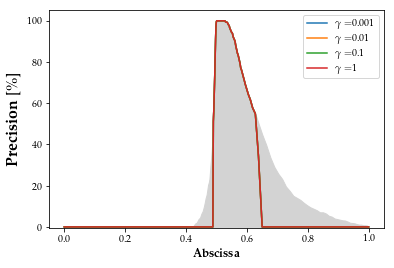

SVC_sigmoid0_c_0.1
[C] 0.1


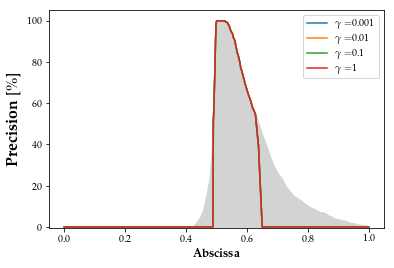

SVC_sigmoid0_c_1
[C] 1


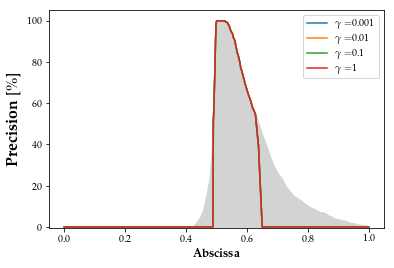

SVC_sigmoid0_c_10
[C] 10


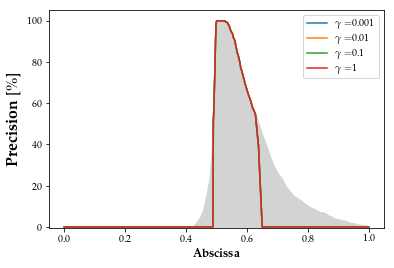

SVC_sigmoid0_c_20
[C] 20


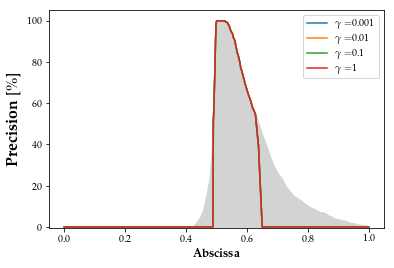

SVC_sigmoid0_c_30
[C] 30


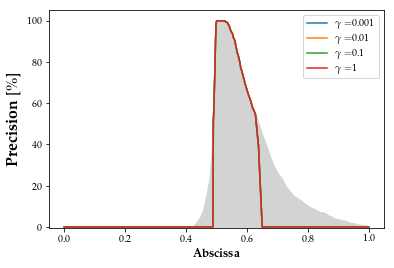

SVC_sigmoid0_c_50
[C] 50


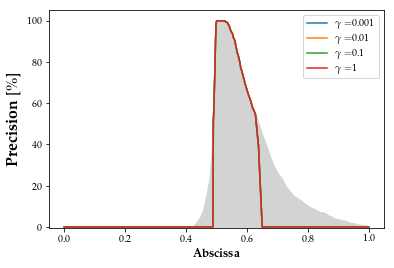

SVC_sigmoid0_c_100
[C] 100


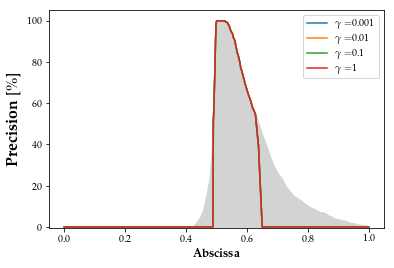

SVC_sigmoid0_c_0.001
[C] 0.001


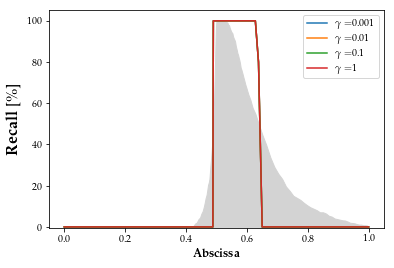

SVC_sigmoid0_c_0.01
[C] 0.01


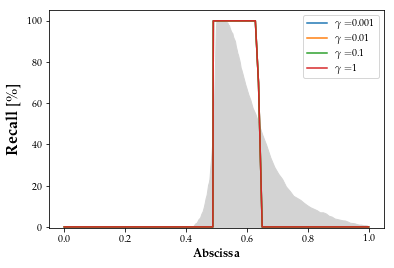

SVC_sigmoid0_c_0.1
[C] 0.1


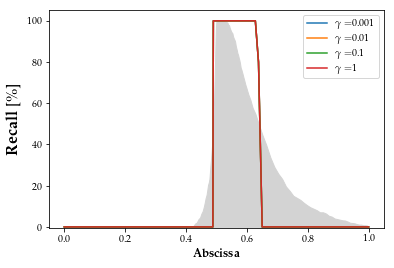

SVC_sigmoid0_c_1
[C] 1


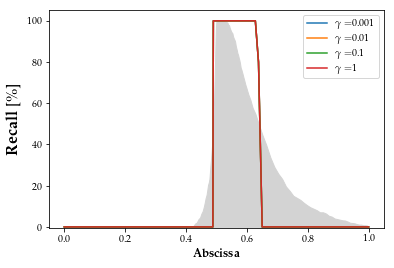

SVC_sigmoid0_c_10
[C] 10


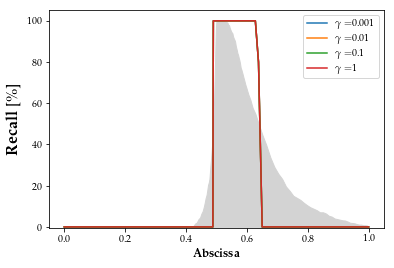

SVC_sigmoid0_c_20
[C] 20


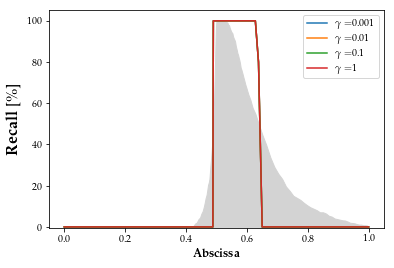

SVC_sigmoid0_c_30
[C] 30


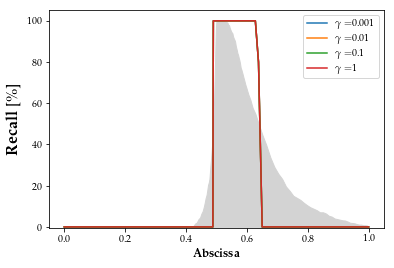

SVC_sigmoid0_c_50
[C] 50


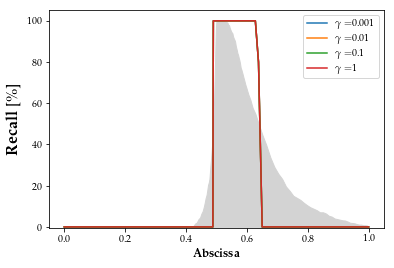

SVC_sigmoid0_c_100
[C] 100


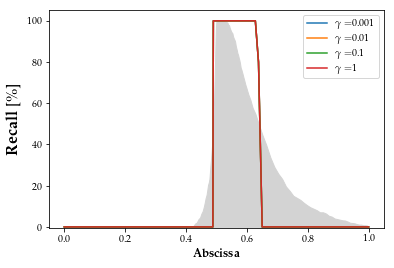

In [66]:
# This requires creating a directory with the name 'Plots'
gamma_vector = [0.001, 0.01, 0.1, 1]
C_vector = [0.001, 0.01, 0.1, 1, 10, 20, 30, 50, 100]
ngamma = len(gamma_vector)
nC = len(C_vector)
degree = 0


# plots
for metric in ['precision', 'recall']:
    for j in range(nC):
        c = C_vector[j]
        algthm_type = 'SVC_sigmoid'+str(degree)+'_c_' + str(C_vector[j])
        print(algthm_type)
        errors = []
        curves_labels = []
        print(r'[C] ' + str(c))
        
        # mean curves
        for i in range(len(gamma_vector)):
            g = gamma_vector[i]
            curves_labels.append('$\gamma = $'+str(g))
            file_name = (str(algthm_type)+'_gamma_'+str(g)+'_'+\
                             str(metric)+'.txt')
            load_errors = np.loadtxt(str(file_name))
            errors.append(load_errors)
        my_plot(errors, curves_labels, metric, algthm_type)

SVC_poly_0_c_0.001
[C] 0.001


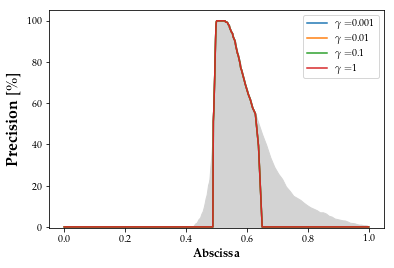

SVC_poly_0_c_0.01
[C] 0.01


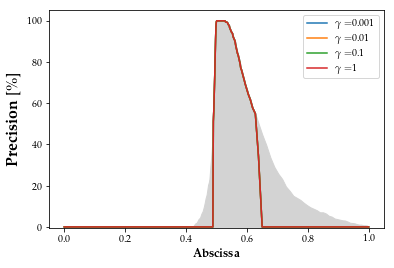

SVC_poly_0_c_0.1
[C] 0.1


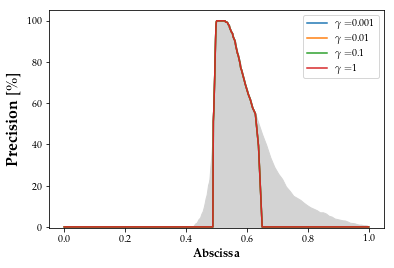

SVC_poly_0_c_1
[C] 1


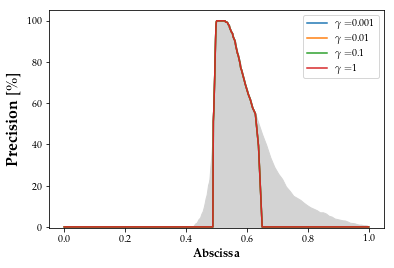

SVC_poly_0_c_0.001
[C] 0.001


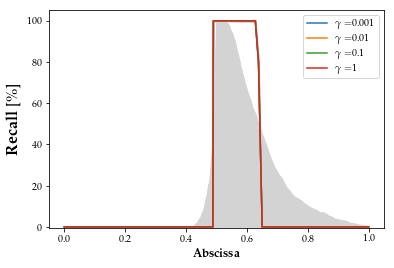

SVC_poly_0_c_0.01
[C] 0.01


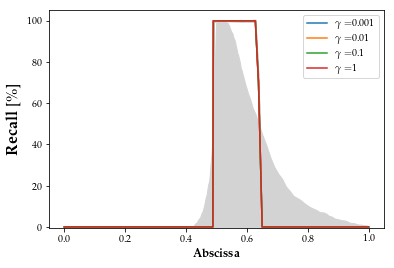

SVC_poly_0_c_0.1
[C] 0.1


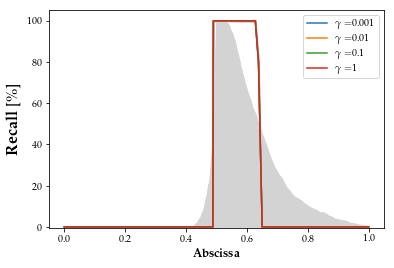

SVC_poly_0_c_1
[C] 1


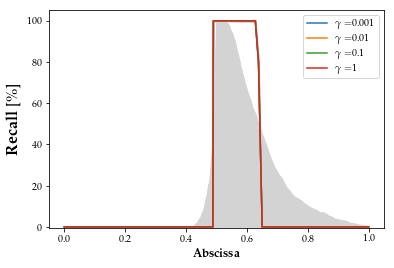

In [68]:
# This requires creating a directory with the name 'Plots'
gamma_vector = [0.001, 0.01, 0.1, 1]
C_vector = [0.001, 0.01, 0.1, 1]
ngamma = len(gamma_vector)
nC = len(C_vector)
kernel='poly'
degree = 0


# plots
for metric in ['precision', 'recall']:
    for j in range(nC):
        c = C_vector[j]
        algthm_type = 'SVC_'+str(kernel)+'_'+str(degree)+'_c_' + str(C_vector[j])
        print(algthm_type)
        errors = []
        curves_labels = []
        print(r'[C] ' + str(c))
        
        # mean curves
        for i in range(len(gamma_vector)):
            g = gamma_vector[i]
            curves_labels.append('$\gamma = $'+str(g))
            file_name = (str(algthm_type)+'_gamma_'+str(g)+'_'+\
                             str(metric)+'.txt')
            load_errors = np.loadtxt(str(file_name))
            errors.append(load_errors)
            
        # std curves            
        algthm_type = 'std_SVC_'+str(kernel)+'_'+str(degree)+'_c_' + str(C_vector[j])
        stds = []
        for i in range(len(gamma_vector)):
            g = gamma_vector[i]
            file_name = (str(algthm_type)+'_gamma_'+str(g)+'_'+\
                             str(metric)+'.txt')
            load_errors = np.loadtxt(str(file_name))
            stds.append(load_errors)
        my_plot(errors, curves_labels, metric, algthm_type, with_std=True, std_vector=stds)